The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


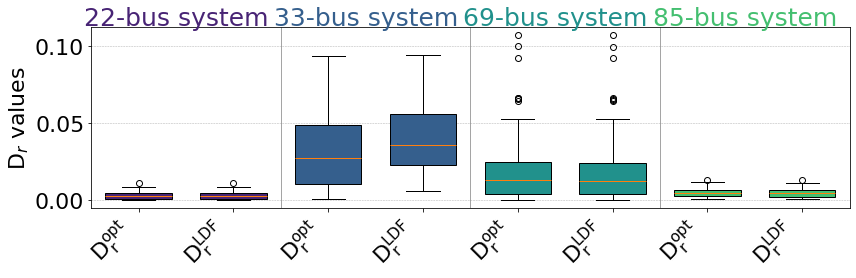

In [1]:
import numpy as np
import matplotlib.pyplot as plt

PATH = '/Users/babaktaheri/Desktop/OLDF/Single-phase' 

test_cases = [22, 33, 69, 85]

paths = {test_case: {"OSDF": f"{PATH}/parameters/Dr_{test_case}bus_TNC.txt", "DF": f"{PATH}/parameters/Dr_{test_case}bus_cold.txt"} for test_case in test_cases}

def get_data(paths):
    """
    Load the data for optimized Dr and cold start Dr.
    """
    Dr_opt = np.loadtxt(paths["OSDF"])
    Dr_cold = np.loadtxt(paths["DF"])
    return [Dr_opt, Dr_cold]

data_all = {test_case: get_data(paths[test_case]) for test_case in test_cases}

fig, ax = plt.subplots(figsize=(12, 4))

labels = ['$\mathregular{D_r^{opt}}$', '$\mathregular{D_r^{LDF}}$']

colors = plt.cm.viridis(np.linspace(0.1, 0.7, len(test_cases)))

bar_width = 0.7

for idx, test_case in enumerate(test_cases):
    data = data_all[test_case]
    positions = [2 * idx + i for i in range(2)]
    bp = ax.boxplot(data, patch_artist=True, vert=True, positions=positions, widths=bar_width)
    for box in bp['boxes']:
        box.set_facecolor(colors[idx])
    
    if idx < len(test_cases) - 1: 
        ax.axvline(2 * (idx + 1) - 0.5, color='grey', linestyle='-', linewidth=0.7)

    ax.text(2 * idx + 0.4, 1.05, f"{test_case}-bus system", transform=ax.get_xaxis_transform(), ha='center', va='center', fontsize=15, color=colors[idx])

all_positions = [2 * idx + i for idx in range(len(test_cases)) for i in range(2)]
ax.set_xticks(all_positions)
ax.set_xticklabels(labels * len(test_cases), rotation=45, ha="right")

ax.set_ylabel('$\mathregular{D}_r$ values', fontsize=22)
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

plt.tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.savefig(f"{PATH}/Figs/Dr_boxplot_comparison.eps", format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


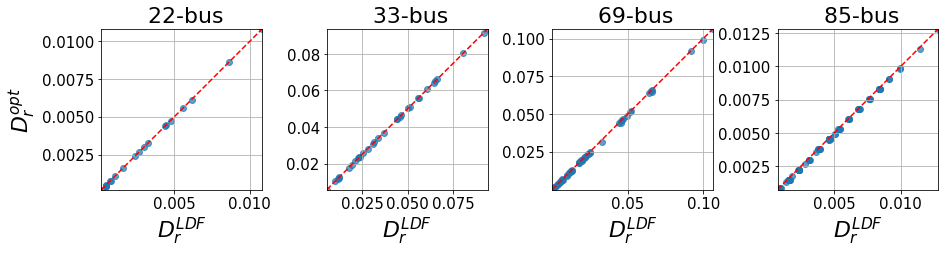

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

test_cases = [22, 33, 69, 85]

paths = {}
for test_case in test_cases:
    paths[test_case] = {
        "OSDF": f"{PATH}/parameters/Dr_{test_case}bus_TNC.txt",
        "DF": f"{PATH}/parameters/Dr_{test_case}bus_cold.txt",
    }

def get_data(paths):
    Dr_opt = np.loadtxt(paths["OSDF"])
    Dr_cold = np.loadtxt(paths["DF"])
    return [Dr_opt, Dr_cold]

data_all = {}
for test_case in test_cases:
    data_all[test_case] = get_data(paths[test_case])


fig = plt.figure(figsize=(15,4))

gs = gridspec.GridSpec(1, 4, wspace=0.4, hspace=0)

for idx, test_case in enumerate(test_cases):
    data = data_all[test_case]
    ax1 = plt.subplot(gs[idx])
    ax1.scatter(data[0], data[1], alpha=0.7)

    ax1.set_aspect('equal', 'box')
    
    axis_limits = [min(min(data[0]), min(data[1])), max(max(data[0]), max(data[1]))]
    ax1.set_xlim(axis_limits)
    ax1.set_ylim(axis_limits)

    ax1.plot(axis_limits, axis_limits, 'r--')  

    ax1.set_title(f' {test_case}-bus', fontsize=22)
    ax1.grid(True)

    ax1.set_xlabel('$D_r^{LDF}$', fontsize=22, fontweight="bold")
    if idx == 0:
        ax1.set_ylabel('$D_r^{opt}$', fontsize=22, fontweight="bold")
    plt.tick_params(axis='both', labelsize=15)

    #fig.tight_layout()
    
#plt.tick_params(axis='both', labelsize=17)

plt.savefig(f"{PATH}/Figs/Dr_scatter_comparison.eps", format='eps', bbox_inches='tight')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


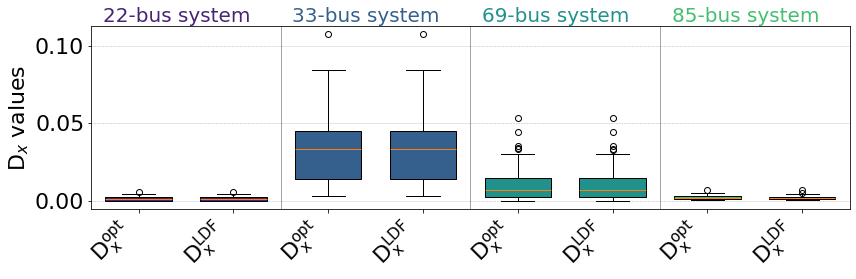

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

PATH = '/Users/babaktaheri/Desktop/OLDF/Single-phase' 

test_cases = [22, 33, 69, 85]

paths = {}
for test_case in test_cases:
    paths[test_case] = {
        "OSDF": f"{PATH}/parameters/Dx_{test_case}bus_TNC.txt",
        "DF": f"{PATH}/parameters/Dx_{test_case}bus_cold.txt",
    }

def get_data(paths):
    Dr_opt = np.loadtxt(paths["OSDF"])
    Dr_cold = np.loadtxt(paths["DF"])
    return [Dr_opt, Dr_cold]

data_all = {}
for test_case in test_cases:
    data_all[test_case] = get_data(paths[test_case])

fig, ax = plt.subplots(figsize=(12, 4))

labels = ['$\mathregular{D_x^{opt}}$','$\mathregular{D_x^{LDF}}$']

# Color palette
colors = plt.cm.viridis(np.linspace(0.1, 0.7, len(test_cases)))
#colors = plt.cm.Blues(np.linspace(0.5, 1.5, len(test_cases)))  # Adjust the range as needed for contrast

bar_width=0.7
# Plot each test case
for idx, test_case in enumerate(test_cases):
    data = data_all[test_case]
    positions = [2 * idx + i for i in range(2)]
    bp = ax.boxplot(data, patch_artist=True, vert=True, positions=positions, widths=bar_width)
    for box in bp['boxes']:
        box.set_facecolor(colors[idx])
    
    # Drawing a thin vertical line to the right of the group
    if idx < len(test_cases) - 1:  # Avoid drawing a line after the last test case
        ax.axvline(2 * (idx + 1) - 0.5, color='grey', linestyle='-', linewidth=0.7)

    # Place the test case name above the group with increased fontsize
    ax.text(2 * idx + 0.4, 1.05, f"{test_case}-bus system", transform=ax.get_xaxis_transform(), ha='center', va='center', fontsize=20, color=colors[idx])

# Setting labels on x-axis
all_positions = [2 * idx + i for idx in range(len(test_cases)) for i in range(2)]
ax.set_xticks(all_positions)
ax.set_xticklabels(labels * len(test_cases), rotation=45, ha="right")

ax.set_ylabel('$\mathregular{D}_x$ values', fontsize=22)
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

plt.tick_params(axis='both', labelsize=22)

plt.tight_layout()
plt.savefig(f"{PATH}/Figs/Dx_boxplot_comparison.eps", format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


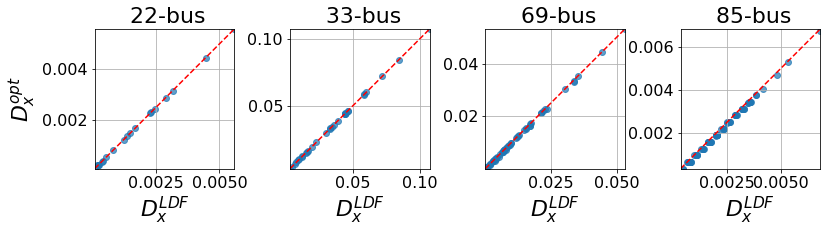

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

test_cases = [22, 33, 69, 85]

# Define paths dynamically
paths = {}
for test_case in test_cases:
    paths[test_case] = {
        "OSDF": f"{PATH}/parameters/Dx_{test_case}bus_TNC.txt",
        "DF": f"{PATH}/parameters/Dx_{test_case}bus_cold.txt",
    }

def get_data(paths):
    Dr_opt = np.loadtxt(paths["OSDF"])
    Dr_cold = np.loadtxt(paths["DF"])
    return [Dr_opt, Dr_cold]

data_all = {}
for test_case in test_cases:
    data_all[test_case] = get_data(paths[test_case])


fig = plt.figure(figsize=(13,4))

gs = gridspec.GridSpec(1, 4, wspace=0.4, hspace=0)

for idx, test_case in enumerate(test_cases):
    data = data_all[test_case]
    ax1 = plt.subplot(gs[idx])
    ax1.scatter(data[0], data[1], alpha=0.7)

    ax1.set_aspect('equal', 'box')
    
    axis_limits = [min(min(data[0]), min(data[1])), max(max(data[0]), max(data[1]))]
    ax1.set_xlim(axis_limits)
    ax1.set_ylim(axis_limits)

    ax1.plot(axis_limits, axis_limits, 'r--')  

    ax1.set_title(f' {test_case}-bus', fontsize=22)
    ax1.grid(True)

    ax1.set_xlabel('$D_x^{LDF}$', fontsize=22, fontweight="bold")
    if idx == 0:
        ax1.set_ylabel('$D_x^{opt}$', fontsize=22, fontweight="bold")
    plt.tick_params(axis='both', labelsize=16)

    #fig.tight_layout()
    
#plt.tick_params(axis='both', labelsize=17)

plt.savefig(f"{PATH}/Figs/Dx_scatter_comparison.eps", format='eps', bbox_inches='tight')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


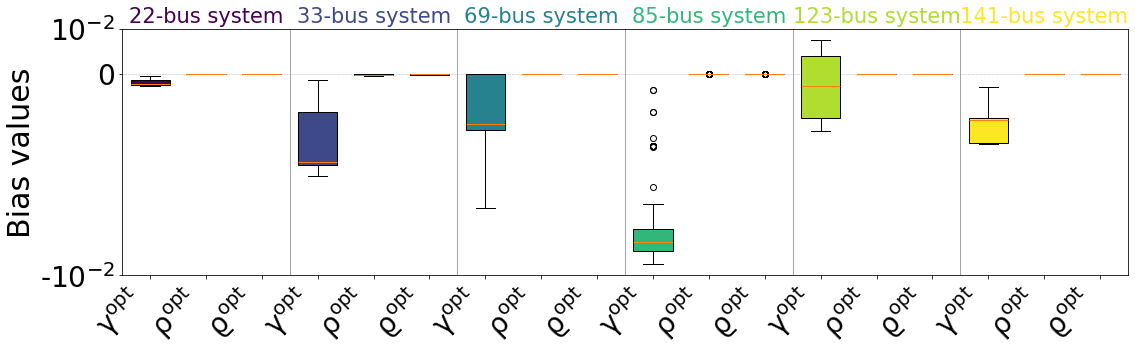

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Base path and test case numbers
PATH = '/Users/babaktaheri/Desktop/OLDF/Single-phase' 

test_cases = [22, 33, 69, 85, 123, 141]

# Define paths dynamically
paths = {}
for test_case in test_cases:
    paths[test_case] = {
        "bias": f"{PATH}/parameters/bias_{test_case}bus_TNC.txt",
        "gamma_P": f"{PATH}/parameters/gamma_P_{test_case}bus_TNC.txt",
        "gamma_Q": f"{PATH}/parameters/gamma_Q_{test_case}bus_TNC.txt",

    }

def get_data(paths):
    bias = np.loadtxt(paths["bias"])
    gamma_P = np.loadtxt(paths["gamma_P"])
    gamma_Q = np.loadtxt(paths["gamma_Q"])
    return [bias, gamma_P, gamma_Q]

data_all = {}
for test_case in test_cases:
    data_all[test_case] = get_data(paths[test_case])

fig, ax = plt.subplots(figsize=(16, 5))

labels = ['$\mathregular{\gamma^{opt}}$','$\mathregular{\\rho^{opt}}$', '$\mathregular{\\varrho^{opt}}$']

colors = plt.cm.viridis(np.linspace(0, 1.1, len(test_cases)))
#colors = plt.cm.Blues(np.linspace(0.5, 1.5, len(test_cases)))  # Adjust the range as needed for contrast

bar_width=0.7
for idx, test_case in enumerate(test_cases):
    data = data_all[test_case]
    positions = [3 * idx + i for i in range(3)]
    bp = ax.boxplot(data, patch_artist=True, vert=True, positions=positions, widths=bar_width)
    for box in bp['boxes']:
        box.set_facecolor(colors[idx])
    
    # Drawing a thin vertical line to the right of the group
    if idx < len(test_cases) - 1:  # Avoid drawing a line after the last test case
        ax.axvline(3 * (idx + 1) - 0.5, color='grey', linestyle='-', linewidth=0.7)

    ax.text(3 * idx + 1, 1.05, f"{test_case}-bus system", transform=ax.get_xaxis_transform(), ha='center', va='center', fontsize=21, color=colors[idx])

all_positions = [3 * idx + i for idx in range(len(test_cases)) for i in range(3)]
ax.set_xticks(all_positions)
ax.set_xticklabels(labels * len(test_cases), rotation=45, ha="right")




ax.set_yscale('symlog')

def symlog_tick_formatter(val, pos=None):
    if val == 0:
        return '0'
    elif val > 0:
        return r"$10^{{{:d}}}$".format(int(np.log10(val)))
    else:
        return r"-$10^{{{:d}}}$".format(int(np.log10(-val)))

ax.yaxis.set_major_formatter(FuncFormatter(symlog_tick_formatter))




ax.set_ylabel('Bias values', fontsize=30)
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

plt.tick_params(axis='both', labelsize=28)

plt.tight_layout()
plt.savefig(f"{PATH}/Figs/bias_boxplot_comparison.eps", format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


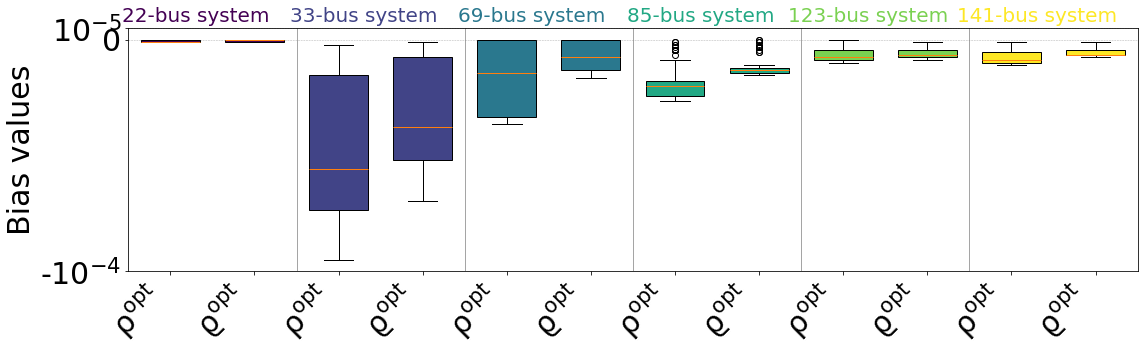

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

PATH = '/Users/babaktaheri/Desktop/OLDF/Single-phase' 

test_cases = [22, 33, 69, 85, 123, 141]

paths = {}
for test_case in test_cases:
    paths[test_case] = {
        "gamma_P": f"{PATH}/parameters/gamma_P_{test_case}bus_TNC.txt",
        "gamma_Q": f"{PATH}/parameters/gamma_Q_{test_case}bus_TNC.txt",

    }

def get_data(paths):
    gamma_P = np.loadtxt(paths["gamma_P"])
    gamma_Q = np.loadtxt(paths["gamma_Q"])
    return [ gamma_P, gamma_Q]

data_all = {}
for test_case in test_cases:
    data_all[test_case] = get_data(paths[test_case])

fig, ax = plt.subplots(figsize=(16, 5))

labels = ['$\mathregular{\\rho^{opt}}$', '$\mathregular{\\varrho^{opt}}$']

# Color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(test_cases)))

bar_width=0.7
for idx, test_case in enumerate(test_cases):
    data = data_all[test_case]
    positions = [2 * idx + i for i in range(2)]
    bp = ax.boxplot(data, patch_artist=True, vert=True, positions=positions, widths=bar_width)
    for box in bp['boxes']:
        box.set_facecolor(colors[idx])
    
    if idx < len(test_cases) - 1:  # Avoid drawing a line after the last test case
        ax.axvline(2 * (idx + 1) - 0.5, color='grey', linestyle='-', linewidth=0.7)

    # Place the test case name above the group with increased fontsize
    ax.text(2 * idx + 0.3, 1.05, f"{test_case}-bus system", transform=ax.get_xaxis_transform(), ha='center', va='center', fontsize=20, color=colors[idx])

all_positions = [2 * idx + i for idx in range(len(test_cases)) for i in range(2)]
ax.set_xticks(all_positions)
ax.set_xticklabels(labels * len(test_cases), rotation=45, ha="right")




ax.set_yscale('symlog')

def symlog_tick_formatter(val, pos=None):
    if val == 0:
        return '0'
    elif val > 0:
        return r"$10^{{{:d}}}$".format(int(np.log10(val)))
    else:
        return r"-$10^{{{:d}}}$".format(int(np.log10(-val)))

ax.yaxis.set_major_formatter(FuncFormatter(symlog_tick_formatter))


ax.set_ylabel('Bias values', fontsize=30)
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

plt.tick_params(axis='both', labelsize=30)

plt.tight_layout()
plt.savefig(f"{PATH}/Figs/rho_boxplot_comparison.eps", format='eps')
plt.show()
